<a href="https://colab.research.google.com/github/Pranita1994/ML-Projects/blob/main/Predictive_Agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predictive Agriculture: Empowering Farmers with ML-driven Insights**

##**Problem Statement:**
The integration of Machine Learning (ML) into agricultural practices represents a groundbreaking opportunity to revolutionize traditional farming methods. By leveraging data-driven insights and predictive analytics, ML technologies offer the potential to optimize agricultural production, enhance crop yields, and mitigate risks arising from environmental uncertainties. This project explores the transformative impact of ML in agriculture, focusing on predictive modeling, precision farming techniques, and personalized interventions to usher in a more sustainable and efficient approach to food production.

### **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from ipywidgets import interact

In [2]:
df = pd.read_csv('/content/Agriculture.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
df.shape

(2200, 8)

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [41]:
print('The average value of nitrogen in the soil: {:.2f}'.format(df['N'].mean()))
print('The average value of potassium in the soil: {:.2f}'.format(df['K'].mean()))
print('The average value of phosphorous in the soil: {:.2f}'.format(df['P'].mean()))
print('The average value of temperature in celsius: {:.2f}'.format(df['temperature'].mean()))
print('The average value of humidity in %: {:.2f}'.format(df['humidity'].mean()))
print('The average value of ph in the soil: {:.2f}'.format(df['ph'].mean()))
print('The average value of rainfall in mm: {:.2f}'.format(df['rainfall'].mean()))


The average value of nitrogen in the soil: 50.55
The average value of potassium in the soil: 48.15
The average value of phosphorous in the soil: 53.36
The average value of temperature in celsius: 25.62
The average value of humidity in %: 71.48
The average value of ph in the soil: 6.47
The average value of rainfall in mm: 103.46


In [39]:
# Function to generate summary statistics for a selected crop
def summary_statistics(crop):
    x = df[df['label'] == crop]
    columns_to_summarize = ['N', 'K', 'P', 'temperature', 'humidity', 'ph', 'rainfall']
    statistics = x[columns_to_summarize].agg(['min', 'mean', 'max']).round(2)

    print(f"{'=' * 60}")
    for column in columns_to_summarize:
        print(f"{column.capitalize()} Statistics")
        print(f"Minimum {column} required: {statistics[column]['min']}")
        print(f"Average {column} required: {statistics[column]['mean']}")
        print(f"Maximum {column} required: {statistics[column]['max']}")
        print(f"{'=' * 60}")

# Interactive widget for selecting crop and displaying summary statistics
@interact
def display_summary_statistics(crops=list(df['label'].value_counts().index)):
    summary_statistics(crops)


interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [42]:
# Average requirement for each crop in average condition

@interact
def compare(conditions=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    print('Average value for', conditions, 'is {:.2f} '.format(df[conditions].mean()))
    print('=========================================================================')
    crop_labels = df['label'].unique()
    for crop in crop_labels:
        print(f'{crop.capitalize()} : {df[df["label"] == crop][conditions].mean():.2f}')



interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [10]:
@interact
def compare(conditions = ['N','P','K','temperature','humidity','ph','rainfall']):
  print('Crops which requires more than average',conditions ,':', (df[df[conditions] > df[conditions].mean()]['label'].nunique()))
  greater_avg_crops = df[df[conditions] > df[conditions].mean()]['label'].unique()

  for crop in greater_avg_crops:
    print(crop)


interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [11]:
@interact
def compare(conditions = ['N','P','K','temperature','humidity','ph','rainfall']):
  print('Crops which requires less than average',conditions ,':', (df[df[conditions] < df[conditions].mean()]['label'].nunique()))
  less_avg_crops = df[df[conditions] < df[conditions].mean()]['label'].unique()

  for crop in less_avg_crops:
    print(crop)

Crops which requires less than average K : 19
rice
maize
kidneybeans
pigeonpeas
mothbeans
mungbean
blackgram
lentil
pomegranate
banana
mango
watermelon
muskmelon
orange
papaya
coconut
cotton
jute
coffee


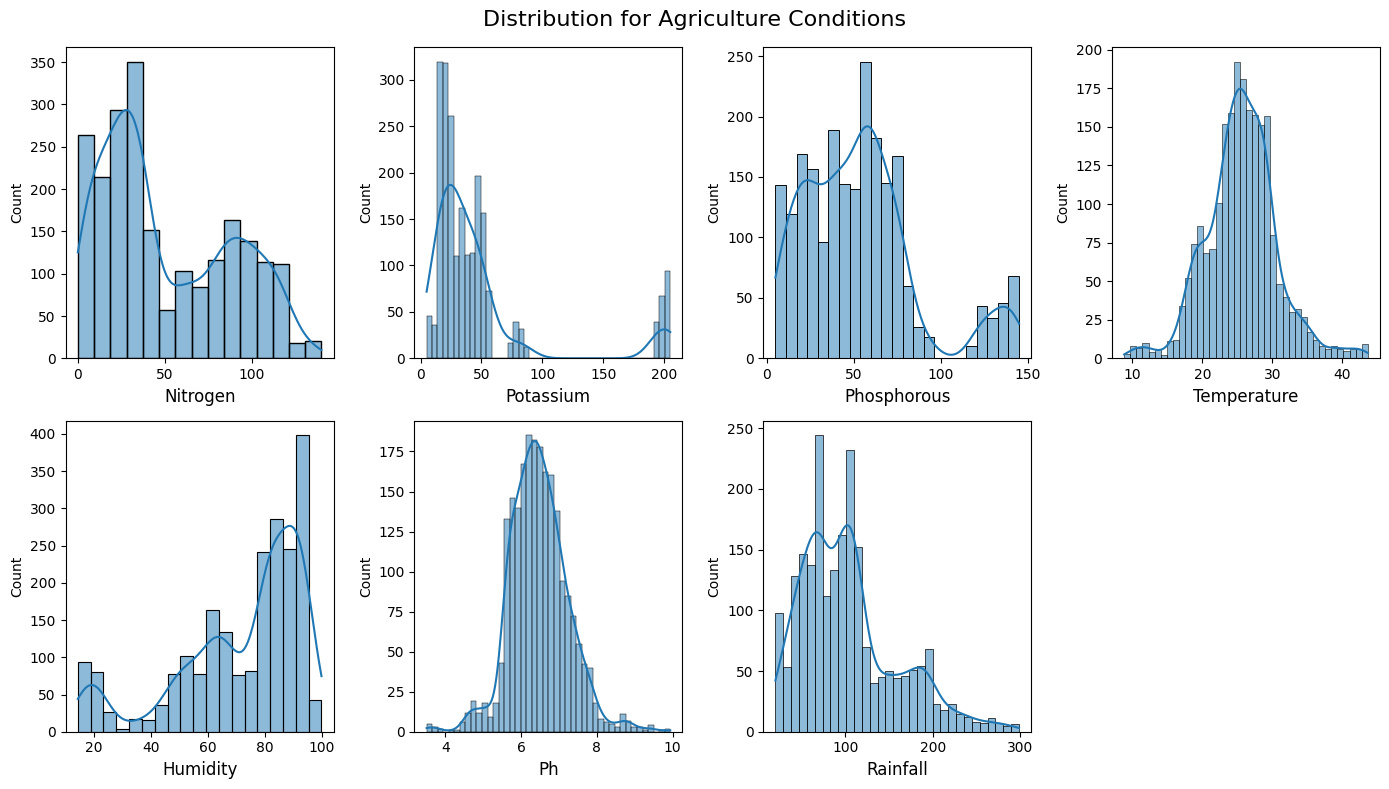

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df contains the DataFrame with columns 'N', 'K', 'P', 'temperature', 'humidity', 'ph', 'rainfall'

fig, axs = plt.subplots(2, 4, figsize=(14, 8),)  # Creating a 2x4 grid for subplots

fig.suptitle('Distribution for Agriculture Conditions', fontsize=16)
# Plot 1
sns.histplot(df['N'], kde= True, ax=axs[0, 0])
axs[0, 0].set_xlabel('Nitrogen', fontsize=12)

# Plot 2
sns.histplot(df['K'],kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('Potassium', fontsize=12)

# Plot 3
sns.histplot(df['P'],kde=True, ax=axs[0, 2])
axs[0, 2].set_xlabel('Phosphorous', fontsize=12)

# Plot 4
sns.histplot(df['temperature'],kde=True, ax=axs[0, 3])
axs[0, 3].set_xlabel('Temperature', fontsize=12)

# Plot 5
sns.histplot(df['humidity'],kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('Humidity', fontsize=12)

# Plot 6
sns.histplot(df['ph'],kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('Ph', fontsize=12)

# Plot 7
sns.histplot(df['rainfall'],kde=True, ax=axs[1, 2])
axs[1, 2].set_xlabel('Rainfall', fontsize=12)

# Remove empty subplot in the last position
fig.delaxes(axs[1, 3])

plt.tight_layout()  # Adjusts subplot parameters for a better layout
plt.show()


In [44]:
conditions = {
    'very high ratio of nitrogen in the soil': ('N', 120),
    'very high ratio of phosphorous in the soil': ('P', 100),
    'very high ratio of potassium in the soil': ('K', 200),
    'very high rainfall': ('rainfall', 200),
    'very low temperature': ('temperature', 10),
    'very high temperature': ('temperature', 40),
    'very low humidity': ('humidity', 20),
    'very high ph': ('ph', 9),
    'very low ph': ('ph', 4)
}

print('Some Interesting patterns')
print('=====================================================================')

for condition, (feature, threshold) in conditions.items():
    print(f'Crops which require {condition}: {df[df[feature] > threshold]["label"].unique()}')
    print('\n')

Some Interesting patterns
Crops which require very high ratio of nitrogen in the soil: ['cotton']


Crops which require very high ratio of phosphorous in the soil: ['grapes' 'apple']


Crops which require very high ratio of potassium in the soil: ['grapes' 'apple']


Crops which require very high rainfall: ['rice' 'papaya' 'coconut']


Crops which require very low temperature: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


Crops which require very high temperature: ['grapes' 'papaya']


Crops which require very low humidity: ['rice' 'maize' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon'
 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']


Crops which require very high ph: ['mothbeans']


Crops which requir

In [38]:
# Lets see which crops are grown in summer season , rainy season , winter season

print("Summer crops : ",df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique())

print("Rainy crops : ",df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique() )

print("Winter crops : ",df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique())


Summer crops :  ['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Rainy crops :  ['rice' 'papaya' 'coconut']
Winter crops :  ['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']


In [15]:
from sklearn.cluster import KMeans

# removing the label column
x = df.drop(['label'], axis = 1)

# selecting all the values of the data
x = x.values

# checking the shape
x.shape

(2200, 7)

In [17]:
# determine the optimum number of clusters in the dataset
plt.rcParams['figure.figsize'] = (10,4)

wcss = []
for i in range(1,11):
  km = KMeans(n_clusters= i, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
  km.fit(x)
  wcss.append(km.inertia_)


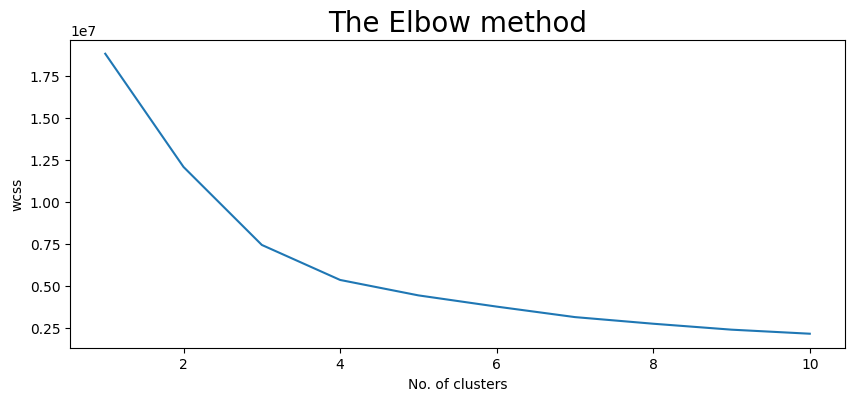

In [18]:
# plot the results

plt.plot(range(1,11), wcss)
plt.title('The Elbow method', fontsize = 20)
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

In [46]:
# K Means algorithm for clustering analysis

from sklearn.cluster import KMeans

# KMeans clustering with 4 clusters
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

# Concatenating cluster labels with crop labels
z = pd.concat([pd.DataFrame(y_means, columns=['cluster']), df['label']], axis=1)

print("Result after applying KMeans for clustering analysis")
for i in range(4):
    print(f"Crops in cluster {i}\n", z[z['cluster'] == i]['label'].unique())
    print('\n\n')


Result after applying KMeans for clustering analysis
Crops in cluster 0
 ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']



Crops in cluster 1
 ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']



Crops in cluster 2
 ['grapes' 'apple']



Crops in cluster 3
 ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']





In [21]:
# split the dataset for predictive modelling

y = df['label']
x = df.drop('label', axis= 1)

print('Shape of x : ', x.shape)
print('shape of y : ', y.shape)


Shape of x :  (2200, 7)
shape of y :  (2200,)


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

print('shape of x_train : ', x_train.shape)
print('shape of x_test : ', x_test.shape)
print('shape of y_train : ', y_train.shape)
print('shape of y_test : ', y_test.shape)

shape of x_train :  (1760, 7)
shape of x_test :  (440, 7)
shape of y_train :  (1760,)
shape of y_test :  (440,)


In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


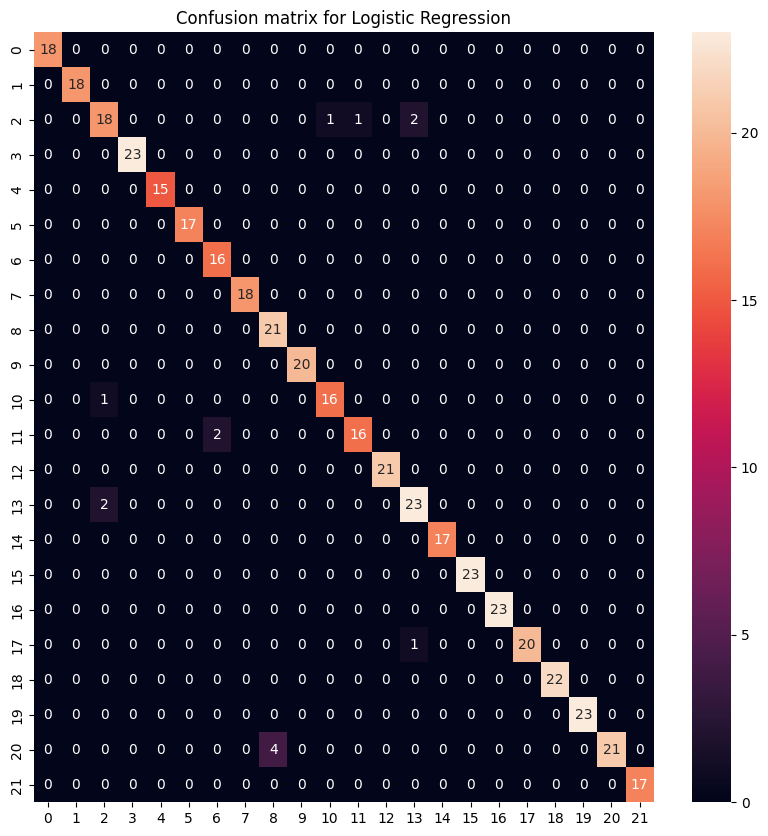

In [47]:
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.title('Confusion matrix for Logistic Regression', fontsize = 12)
plt.show()

In [29]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

The reported metrics indicate a strong performance overall with high precision, recall, and F1-scores for most classes. However, some classes exhibit slightly lower performance in metrics like recall and F1-score, particularly 'blackgram', 'jute', 'maize', 'rice', indicating potential areas for improvement for the model's predictions on these classes.

In [30]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [32]:
prediction = model.predict((np.array([[90, 50, 45, 10, 80, 7, 250]])))
print('Suggested crop for this climatic condition is ', prediction)

Suggested crop for this climatic condition is  ['rice']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Conclusion:**



*   The model's strong performance signifies its potential in aiding farmers with informed decisions related to sowing, irrigation, fertilization, and pest control, contributing to improved crop management practices.
*  The majority of crop classes exhibit exceptional precision, recall, and F1-scores, showcasing the model's proficiency in accurate predictions.

* The model achieves an overall accuracy of 97%, indicating its ability to effectively classify various crop types based on the provided features

*  Despite specific areas for improvement, the model's effectiveness at 97% accuracy underscores the transformative potential of machine learning in agriculture, promising increased productivity, sustainability, and support for global food security.

*  Some specific crop classes like 'blackgram', 'jute', 'maize', and 'rice' demonstrate comparatively lower performance metrics, indicating the need for further model refinement in predicting these classes.


*   Addressing the lower-performing classes could involve strategies such as acquiring more diverse data, adjusting model parameters, or exploring alternative machine learning algorithms to enhance predictive accuracy.


*  Continued research and refinement could lead to further advancements in machine learning models for agriculture, potentially revolutionizing farming practices and bolstering food production in the face of evolving environmental challenges.

